The objective of this notebook is to generate synthetic data which has the same variability as the historical data. In particular, we want the synthetic data to have the same covariance matrix as the historical data.
## Which variables should be included in this covariance matrix?
Some of the variables do not look Normal, and therefore the multivariate_normal method will always fail to make data that resembles the original distributions. Based on the histograms, Treasury Rate, home price index, mortgage rate, rent index, and vacancy rate seem more like uniform distributions (though home price index looks potentially like a bimodal Normal). I would exclude these variables from this data generation process. In the last cell, I generated new data without these variables included in the covariance matrix. The plots didn't change much, but at least it's easier to focus on the variables where you have a chance at modelling them as Normal.

In [1]:
import numpy as np,pandas as pd
import matplotlib.pyplot as plt, seaborn as sn

In [2]:
SP500_quart_rate = pd.read_csv('SP500_quart_rate.csv',header=0,names=['DATE','SP500_Change'])
inflation_quart_rate = pd.read_csv('inflation_quart_rate.csv',header=0,names=['DATE','Inflation_Val','Inflation_Change'])
treasury_bond_quart_rate = pd.read_csv('treasury_bond_quart_rate.csv',header=0,names=['DATE','Treasury_Rate','Treasury_Rate_Change'])
home_price_quart_rate = pd.read_csv('home_price_quart_rate.csv',header=0,names=['DATE','Home_Price_Index','Home_Price_Change'])
mortgage_quart_rate = pd.read_csv('mortgage_quart_rate.csv',header=0,names=['DATE','Mortgage_Rate','Mortgage_Rate_Change'])
rent_quart_rate = pd.read_csv('rent_quart_rate.csv',header=0,names=['DATE','Rent_Index','Rent_Change'])
vacancy_quart_rate = pd.read_csv('vacancy_quart_rate.csv',header=0,names=['DATE','Vacancy_Rate','Vacancy_Rate_Change'])
SP500_quart_rate.head()

,DATE,SP500_Change
0,4/1/1871,0.082207
1,7/1/1871,0.011603
2,10/1/1871,-0.015856
3,1/1/1872,0.072985
4,4/1/1872,0.079733


In [3]:
merged_df = SP500_quart_rate.merge(inflation_quart_rate, how='left',left_on='DATE', right_on='DATE')
merged_df = merged_df.merge(treasury_bond_quart_rate, how='left',left_on='DATE', right_on='DATE')
merged_df = merged_df.merge(home_price_quart_rate, how='left',left_on='DATE', right_on='DATE')
merged_df = merged_df.merge(mortgage_quart_rate, how='left',left_on='DATE', right_on='DATE')
merged_df = merged_df.merge(rent_quart_rate, how='left',left_on='DATE', right_on='DATE')
merged_df = merged_df.merge(vacancy_quart_rate, how='left',left_on='DATE', right_on='DATE')
# merged_df.drop(columns=['Inflation_Val','Treasury_Rate','Mortgage_Rate','Vacancy_Rate'],inplace=True)
merged_df.describe()

,SP500_Change,Inflation_Val,Inflation_Change,Treasury_Rate,Treasury_Rate_Change,Home_Price_Index,Home_Price_Change,Mortgage_Rate,Mortgage_Rate_Change,Rent_Index,Rent_Change,Vacancy_Rate,Vacancy_Rate_Change
count,605.000000,226.000000,226.000000,241.000000,241.000000,189.000000,189.000000,204.000000,204.000000,301.000000,301.000000,265.000000,265.000000
mean,0.025429,0.991225,2.048323,0.059338,0.004182,244.850899,0.012510,7.772555,0.000178,132.192162,0.008940,7.306038,0.000629
std,0.080675,0.953034,45.948455,0.029919,0.105837,124.054913,0.014110,3.294736,0.062679,97.480651,0.005044,1.503141,0.044940
min,-0.269888,-3.959670,-296.181091,0.006506,-0.496250,60.980000,-0.031516,2.760714,-0.134924,25.300000,-0.000420,5.000000,-0.136364
25%,-0.015856,0.482654,-0.681127,0.038921,-0.053154,142.460000,0.007493,5.048077,-0.039877,41.266667,0.005618,5.900000,-0.028571
50%,0.026396,0.924664,-0.127044,0.057461,0.002023,215.270000,0.012348,7.438462,-0.007321,107.666667,0.008236,7.300000,0.000000
75%,0.071714,1.491494,0.417322,0.076738,0.044513,343.030000,0.017778,9.569808,0.030036,206.100000,0.011752,8.200000,0.030612
max,0.646952,4.368953,524.908290,0.148384,0.545259,617.890000,0.067942,17.735714,0.377742,365.331333,0.034749,11.100000,0.142857


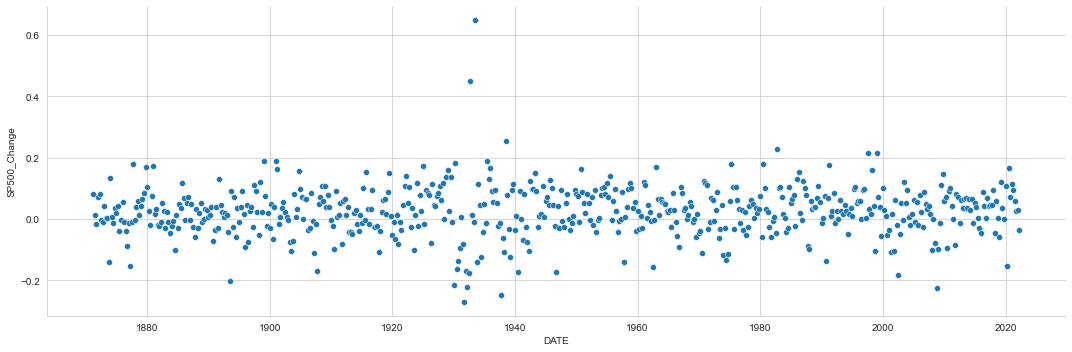

In [4]:
merged_df['DATE']= pd.to_datetime(merged_df['DATE'])
sn.set_style('whitegrid')
sn.relplot(data=merged_df, x='DATE', y='SP500_Change',
           aspect=3
          )
plt.show()

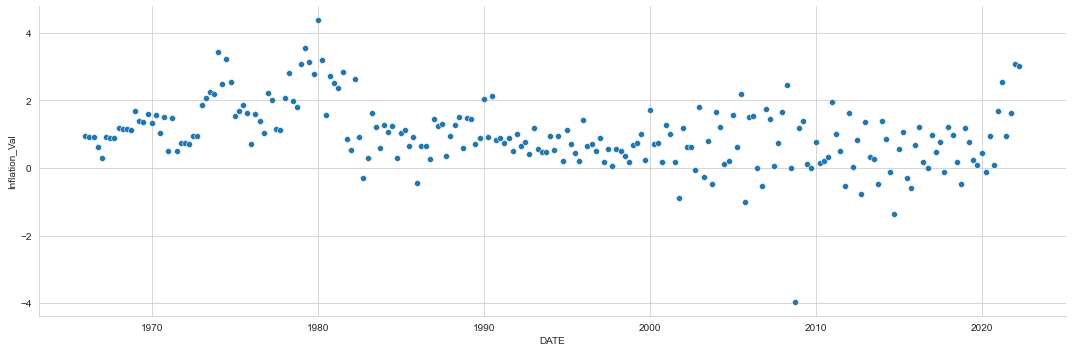

In [5]:
sn.relplot(data=merged_df, x='DATE', y='Inflation_Val',
           aspect=3)
plt.show()

## A little bit of data cleaning?
Based on the graph below, it seems that inflation_Change has some outliers. It might be a good idea to set a threshold for removing these outliers, so that the mean and st. dev do not get unduly influenced by them. In the next graph, you can see how the data would look with a threshold of 200 (for both positive and negative values).

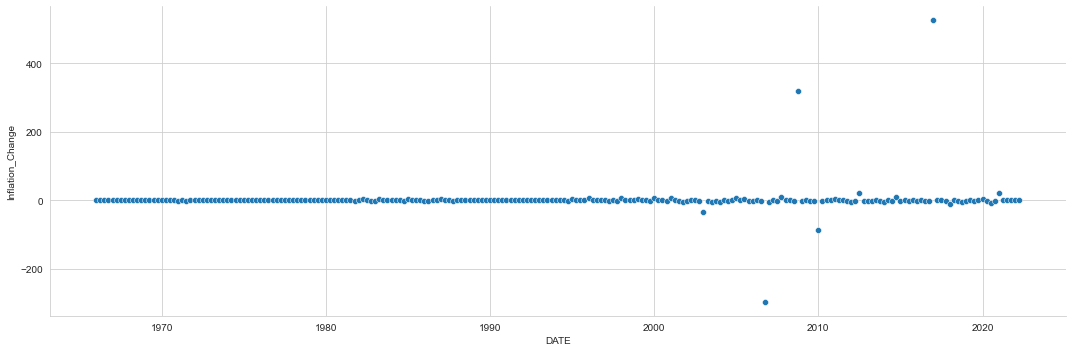

In [6]:
sn.relplot(data=merged_df, x='DATE', y='Inflation_Change',
           aspect=3)
plt.show()

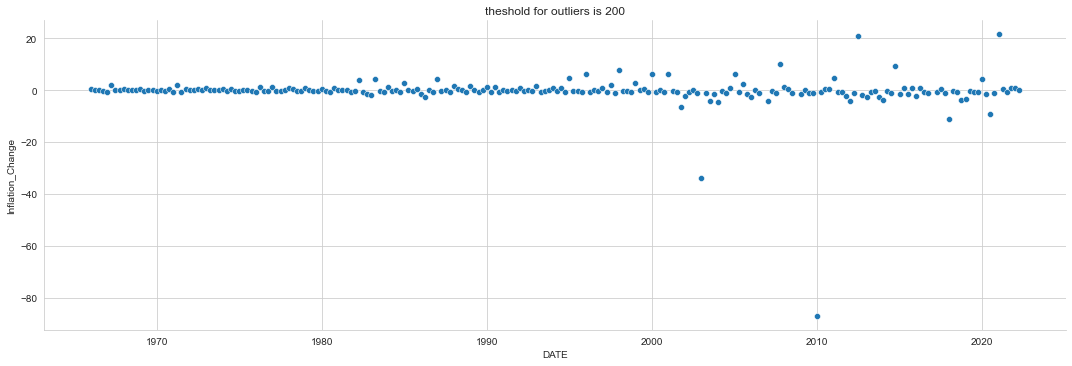

In [7]:
thresh=200
sn.relplot(data=merged_df[(merged_df['Inflation_Change']<thresh) & (merged_df['Inflation_Change']>-thresh)], 
           x='DATE', y='Inflation_Change',
           aspect=3)
plt.title(f"theshold for outliers is {thresh}")
plt.show()

                      SP500_Change  Inflation_Change  Treasury_Rate_Change  \
SP500_Change              0.006508         -0.351963              0.001075   
Inflation_Change         -0.351963       2111.260480              0.181097   
Treasury_Rate_Change      0.001075          0.181097              0.011202   
Home_Price_Change         0.000097         -0.034101              0.000188   
Mortgage_Rate_Change     -0.000203          0.169362              0.005358   
Rent_Change              -0.000027         -0.002547              0.000013   
Vacancy_Rate_Change       0.000257          0.076386              0.000087   

                      Home_Price_Change  Mortgage_Rate_Change  Rent_Change  \
SP500_Change                   0.000097             -0.000203    -0.000027   
Inflation_Change              -0.034101              0.169362    -0.002547   
Treasury_Rate_Change           0.000188              0.005358     0.000013   
Home_Price_Change              0.000199              0.000107  

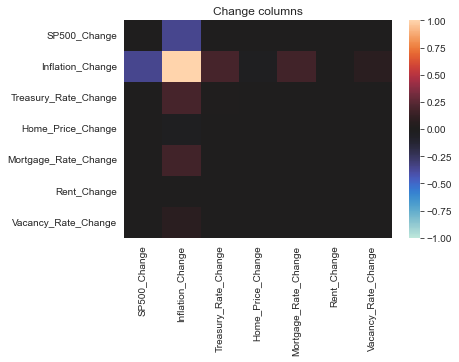

In [8]:
columns= merged_df.columns[merged_df.columns.str.endswith('Change')]
covMatrix = merged_df[columns].cov()
print(covMatrix)
sn.heatmap(covMatrix, vmin=-1, vmax=1, center=0)
plt.title('Change columns')
plt.show()

                  Inflation_Val  Treasury_Rate  Home_Price_Index  \
Inflation_Val          0.908275       0.011042        -31.771027   
Treasury_Rate          0.011042       0.000895         -3.484344   
Home_Price_Index     -31.771027      -3.484344      15389.621440   
Mortgage_Rate          1.168763       0.104319       -345.968689   
Rent_Index           -30.850848      -1.808432      10090.778473   
Vacancy_Rate          -0.611159      -0.023393         83.976163   

                  Mortgage_Rate    Rent_Index  Vacancy_Rate  
Inflation_Val          1.168763    -30.850848     -0.611159  
Treasury_Rate          0.104319     -1.808432     -0.023393  
Home_Price_Index    -345.968689  10090.778473     83.976163  
Mortgage_Rate         10.855283   -227.727517     -2.595201  
Rent_Index          -227.727517   9502.477229     58.434316  
Vacancy_Rate          -2.595201     58.434316      2.259433  


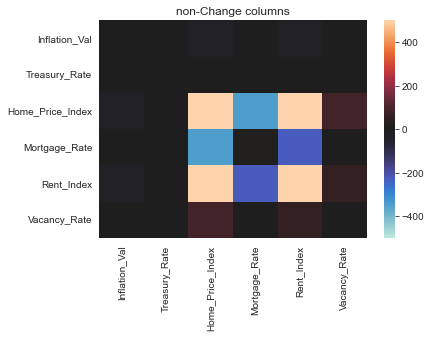

In [9]:
columns= merged_df.columns[~merged_df.columns.str.endswith('Change')]
covMatrix = merged_df[columns].cov()
print(covMatrix)
sn.heatmap(covMatrix, vmin=-500, vmax=500, center=0)
plt.title('non-Change columns')
plt.show()

In [10]:
covMatrix = merged_df.drop(columns='DATE').cov().values
mu = merged_df.drop(columns='DATE').mean().values
print("Shape of covariance matrix",covMatrix.shape)
print("Shape of averages", mu.shape)

Shape of covariance matrix (13, 13)
Shape of averages (13,)


In [11]:
num_samples = 300
rng = np.random.default_rng()
gen_data = rng.multivariate_normal(mu, covMatrix, size=num_samples)

C:\Users\frank\AppData\Local\Temp\ipykernel_10244\2918175329.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  gen_data = rng.multivariate_normal(mu, covMatrix, size=num_samples)


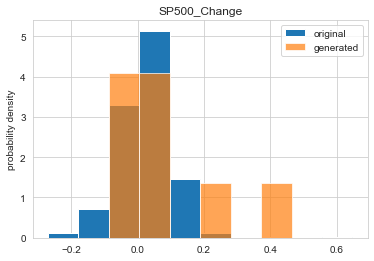

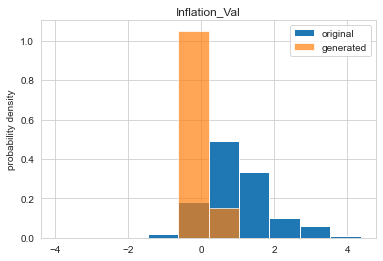

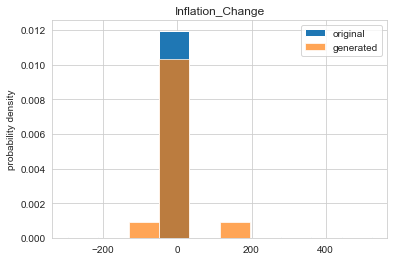

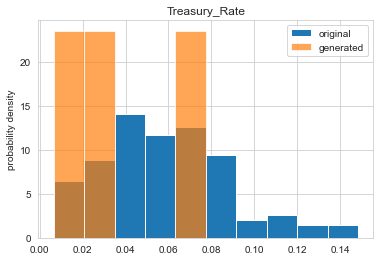

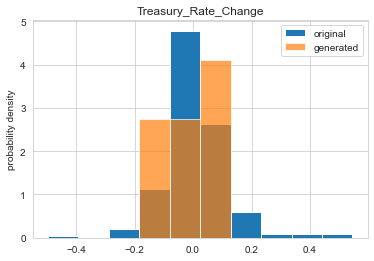

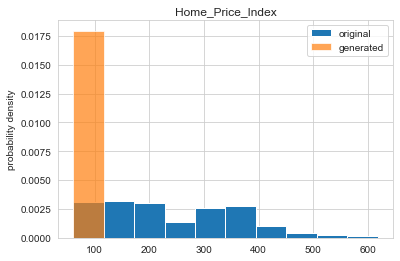

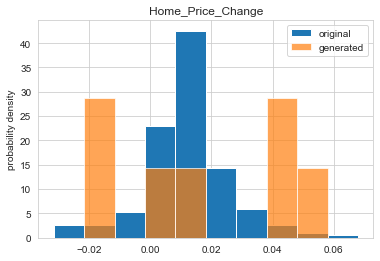

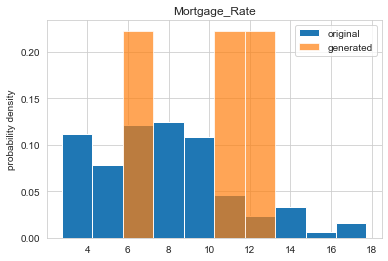

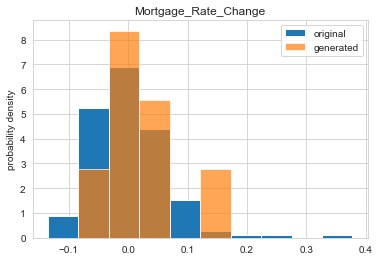

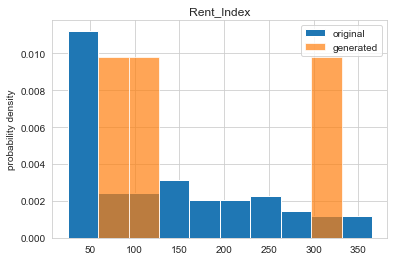

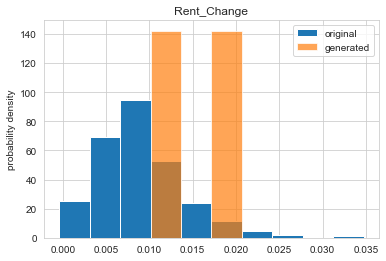

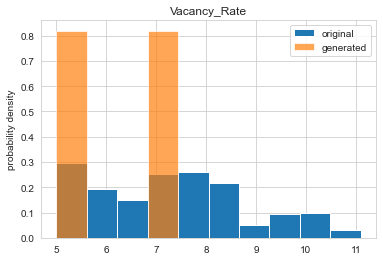

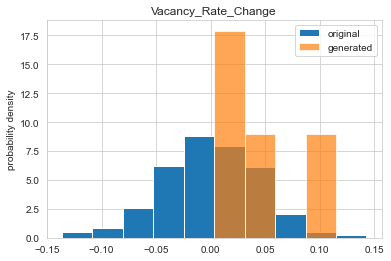

In [12]:
for idx, col in enumerate(merged_df.drop(columns='DATE').columns):
    plt.figure()
    plt.title(col)
    #use the same bins for both plots and normalize the density
    _, bins, _= plt.hist(merged_df[col],label='original', density=True)
    plt.hist(gen_data[idx],label='generated', bins=bins, density=True, alpha=0.7)
    plt.ylabel('probability density')
    plt.legend()

In [13]:
col2drop=['DATE', 'Treasury_Rate','Home_Price_Index',
          'Mortgage_Rate','Rent_Index', 'Vacancy_Rate'
         ]
covMatrix = merged_df.drop(columns=col2drop).cov().values
mu = merged_df.drop(columns=col2drop).mean().values
gen_data = rng.multivariate_normal(mu, covMatrix, size=num_samples)

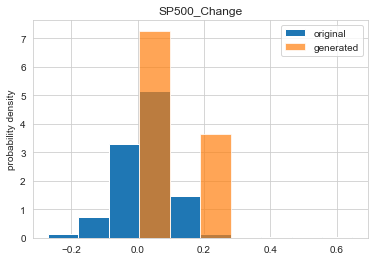

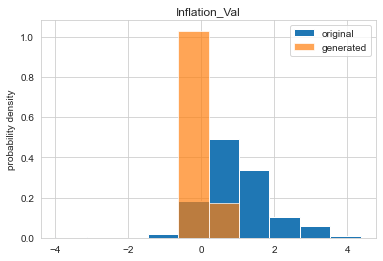

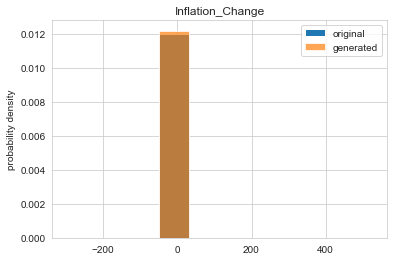

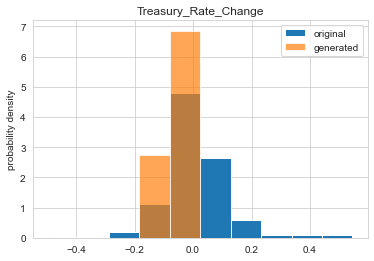

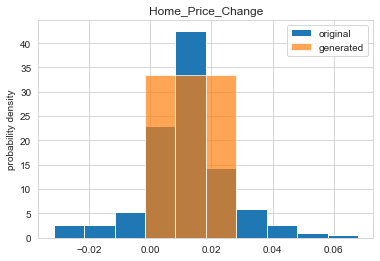

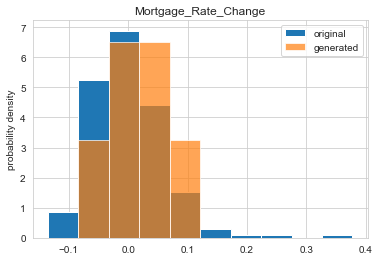

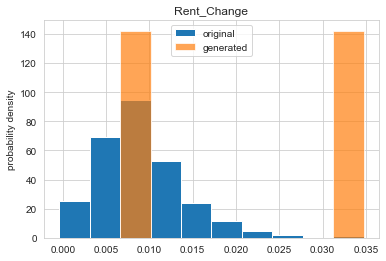

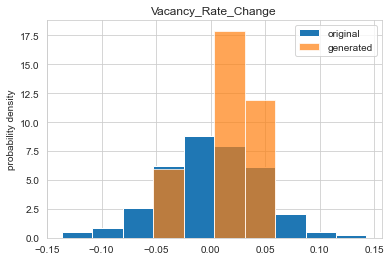

In [14]:
for idx, col in enumerate(merged_df.drop(columns=col2drop).columns):
    plt.figure()
    plt.title(col)
    #use the same bins for both plots and normalize the density
    _, bins, _= plt.hist(merged_df[col],label='original', density=True)
    plt.hist(gen_data[idx],label='generated', bins=bins, density=True, alpha=0.7)
    plt.ylabel('probability density')
    plt.legend()